In [ ]:
# Import libraries used 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tweepy
from tweepy import OAuthHandler

In [ ]:
#Get from developers.twitter.com/App->Setting->keys&tokens
#Just assign the credentials

consumer_key = "n6TdQ7qSpjJkMUjeOG0SDZUGW"
consumer_secret = "PgBIu35oI3iVfeXbPNDJ7h63uqlYIFRQbO38F0HHXV4WYr8Z63"
access_token = "2511047768-SRyZ0eCZiai5o1q8r49QXb8z8hcozMfqoq6lU0a"
access_token_secret = "nB2GD6nmiho12JuwQt1yQx2Jy61W3TLs7FvvD4L99vitG"

#authenticate the API.
auth = tweepy.OAuthHandler( consumer_key , consumer_secret )
auth.set_access_token( access_token , access_token_secret )
api = tweepy.API(auth)

In [ ]:

# Lets create a Dataframe to store the extracted data.

df = pd.DataFrame(columns=["Date","User","IsVerified","Tweet","Likes","RT",'User_location'])
print(df)

Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Likes, RT, User_location]
Index: []


In [ ]:
# 4.Write a Function to extract tweets:

# We will Use **tweepy.cursor()** because we want to extract a larger number of tweets i.e over 100,500 etc


def get_tweets(Topic,Count):    
    i=0
    for tweet in tweepy.Cursor(api.search, q=Topic,count=100, lang="en",exclude='retweets').items():
        print(i, end='\r')
        df.loc[i,"Date"] = tweet.created_at
        df.loc[i,"User"] = tweet.user.name
        df.loc[i,"IsVerified"] = tweet.user.verified
        df.loc[i,"Tweet"] = tweet.text
        df.loc[i,"Likes"] = tweet.favorite_count
        df.loc[i,"RT"] = tweet.retweet_count
        df.loc[i,"User_location"] = tweet.user.location
        #df.to_csv("TweetDataset.csv",index=False)
        df.to_excel('{}.xlsx'.format("TweetDataset"),index=False)   ## Save as Excel
        i=i+1
        if i>Count:
            break
        else:
            pass

In [ ]:
# Call the function to extract the data. pass the topic and filename you want the data to be stored in.
Topic=["Computer"]
get_tweets(Topic , Count=100)

In [ ]:
df.head(8)

,Date,User,IsVerified,Tweet,Likes,RT,User_location
0,2021-11-02 20:20:37,Lengthy Lass,False,@chloe_ruppel Wut ❓ paperz 📝 I invented the co...,0,0,"Milwaukee, WI"
1,2021-11-02 20:20:34,Given Edward,True,@rugilandavyi My computer is 128 GB with 120 G...,0,0,Africa
2,2021-11-02 20:20:28,Neil’s Darts,False,"Quick first to 5 and got my ass handed to me, ...",0,0,"Scotland, United Kingdom"
3,2021-11-02 20:20:27,Uncle Duke,False,"Iconic artists, iconic music. Listen to The Ma...",0,0,
4,2021-11-02 20:20:26,wilkins coffee for all,False,@biggestjoel Look at this. Send me money to te...,0,0,marginal
5,2021-11-02 20:20:26,Filling Space,False,"""A major thrust is enabling technological tele...",0,0,Earth
6,2021-11-02 20:20:25,zeina🤝🇵🇸,False,@LHLL0V3R @91KILLYOURMIND guc mafehash cs love...,0,0,
7,2021-11-02 20:20:21,Alex/Lyra misses wilbur,False,@ayooitslizz ON COMPUTER,0,0,any + neos


In [ ]:
# Function to Clean the Tweet.

import re
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())

In [ ]:
# Funciton to analyze Sentiment

from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [ ]:
df['clean_tweet'] = df['Tweet'].apply(lambda x : clean_tweet(x))
df.head(5)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet
0,2021-11-02 20:20:37,Lengthy Lass,False,@chloe_ruppel Wut ❓ paperz 📝 I invented the co...,0,0,"Milwaukee, WI",ruppel wut paperz i invented the computer at t...
1,2021-11-02 20:20:34,Given Edward,True,@rugilandavyi My computer is 128 GB with 120 G...,0,0,Africa,my computer is 128 gb with 120 gb alredy full ...
2,2021-11-02 20:20:28,Neil’s Darts,False,"Quick first to 5 and got my ass handed to me, ...",0,0,"Scotland, United Kingdom",quick first to 5 and got my ass handed to me c...
3,2021-11-02 20:20:27,Uncle Duke,False,"Iconic artists, iconic music. Listen to The Ma...",0,0,,iconic artists iconic music listen to the mad ...
4,2021-11-02 20:20:26,wilkins coffee for all,False,@biggestjoel Look at this. Send me money to te...,0,0,marginal,look at this send me money to tell you i left ...


In [ ]:

df["Sentiment"] = df["Tweet"].apply(lambda x : analyze_sentiment(x))
df.head(5)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet,Sentiment
0,2021-11-02 20:20:37,Lengthy Lass,False,@chloe_ruppel Wut ❓ paperz 📝 I invented the co...,0,0,"Milwaukee, WI",ruppel wut paperz i invented the computer at t...,Positive
1,2021-11-02 20:20:34,Given Edward,True,@rugilandavyi My computer is 128 GB with 120 G...,0,0,Africa,my computer is 128 gb with 120 gb alredy full ...,Positive
2,2021-11-02 20:20:28,Neil’s Darts,False,"Quick first to 5 and got my ass handed to me, ...",0,0,"Scotland, United Kingdom",quick first to 5 and got my ass handed to me c...,Positive
3,2021-11-02 20:20:27,Uncle Duke,False,"Iconic artists, iconic music. Listen to The Ma...",0,0,,iconic artists iconic music listen to the mad ...,Positive
4,2021-11-02 20:20:26,wilkins coffee for all,False,@biggestjoel Look at this. Send me money to te...,0,0,marginal,look at this send me money to tell you i left ...,Neutral


In [ ]:
# Overall Summary

print("Total Tweets Extracted for Topic : {} are : {}".format(Topic,len(df.Tweet)))
print("Total Positive Tweets are : {}".format(len(df[df["Sentiment"]=="Positive"])))
print("Total Negative Tweets are : {}".format(len(df[df["Sentiment"]=="Negative"])))
print("Total Neutral Tweets are : {}".format(len(df[df["Sentiment"]=="Neutral"])))

Total Tweets Extracted for Topic : ['Computer'] are : 101
Total Positive Tweets are : 46
Total Negative Tweets are : 20
Total Neutral Tweets are : 35


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Summary of Counts for Total tweets')

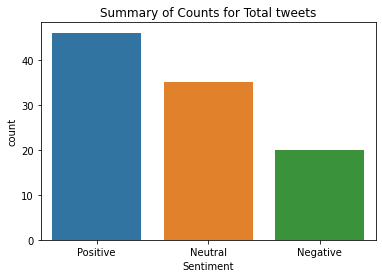

In [ ]:
sns.countplot(df["Sentiment"])
plt.title("Summary of Counts for Total tweets")

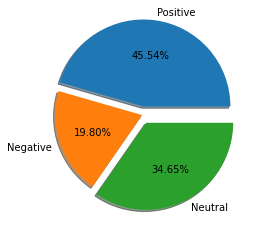

In [ ]:
#Pie chart
a=len(df[df["Sentiment"]=="Positive"])
b=len(df[df["Sentiment"]=="Negative"])
c=len(df[df["Sentiment"]=="Neutral"])
d=np.array([a,b,c])
explode = (0.1, 0.0, 0.1)
plt.pie(d,shadow=True,explode=explode,labels=["Positive","Negative","Neutral"],autopct='%1.2f%%');